# Part 1
## To import data,  explore the code, and process it to make it ready for modeling. 
### By Manqiong Chen and Yifei Wang

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

#Mount your Google drive so you can read them easilu
from google.colab import drive
drive.mount('/content/gdrive')

import random
random.seed(8)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

# Review below URL and make sure the URL points to the folder in your drive where you have the file named "LD2011_2014.txt".
# You may either use the datafile from the Shared Folder that I have created named "Shared_Drop_Box_UoT_3253_ML_Saeid_Abolfazli" or 
# download it from server (follow the URL provided in the first text cell in this Notebook), upload it to your Drive, and load it here. 
# Send me email if you have question so I can help!

filePath ="/content/gdrive/My Drive/UofT_MachineLearning/ML_Project/books.csv"

# with fileinput.FileInput(filePath, inplace=True, backup='.bak') as file:
#     for line in file:
#         print(line.replace(",", ";"), end='')

In [80]:
df=pd.read_csv(filePath,error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [81]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [82]:
len(df)

13714

In [83]:
len(df['bookID'].unique())

13714

In [84]:
df1=df[['authors','average_rating','language_code','# num_pages','ratings_count','text_reviews_count']]
df1.head()

,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,J.K. Rowling,4.41,eng,352,6267,272
4,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [85]:
df1.authors.value_counts()

Agatha Christie                                            69
Stephen King                                               66
Orson Scott Card                                           48
Rumiko Takahashi                                           46
P.G. Wodehouse                                             42
Terry Brooks                                               40
Piers Anthony                                              34
Margaret Weis-Tracy Hickman                                33
Dan Simmons                                                32
Gabriel García Márquez                                     31
J.R.R. Tolkien                                             31
Sandra Brown                                               31
Michael Crichton                                           30
Mercedes Lackey                                            30
Alan Dean Foster                                           29
Anne Rice                                                  29
Dick Fra

In [86]:
df1.language_code.value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
cat          3
enm          3
lat          3
tur          3
ara          2
dan          1
heb          1
ale          1
wel          1
gla          1
msa          1
nor          1
srp          1
Name: language_code, dtype: int64

In [87]:
df1.describe()

,average_rating,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000
mean,3.930620,342.402727,1.776540e+04,533.632128
std,0.357893,252.650165,1.129572e+05,2529.006691
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,196.000000,8.300000e+01,7.000000
50%,3.960000,301.000000,6.305000e+02,40.000000
75%,4.130000,421.000000,4.742250e+03,222.000000
max,5.000000,6576.000000,5.629932e+06,93619.000000


In [88]:
# there is no missing data

df1.isnull().sum()

authors               0
average_rating        0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [89]:
# Replace average rating, number of pages, rating count, and text review count 0 part to median

mean_average_rating = df1['average_rating'].mean(skipna=True)
mean_num_pages = df1['# num_pages'].mean(skipna=True)
mean_ratings_count = df1['ratings_count'].mean(skipna=True)
mean_text_reviews_count = df1['text_reviews_count'].mean(skipna=True)

df1['average_rating']=df1.average_rating.mask(df1.average_rating == 0,mean_average_rating)
df1['# num_pages']=df1['# num_pages'].mask(df1['# num_pages'] == 0,mean_num_pages)
df1['ratings_count']=df1.ratings_count.mask(df1.ratings_count == 0,mean_ratings_count)
df1['text_reviews_count']=df1.text_reviews_count.mask(df1.text_reviews_count == 0,mean_text_reviews_count)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [90]:
# After change missing data, we have the summary as in below: 

df1.describe()

,average_rating,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000
mean,3.940365,344.524955,1.791308e+04,569.002669
std,0.299477,251.198909,1.129455e+05,2525.024246
min,1.000000,1.000000,1.000000e+00,1.000000
25%,3.770000,199.000000,8.900000e+01,12.000000
50%,3.960000,304.000000,6.715000e+02,63.000000
75%,4.130000,421.000000,5.061750e+03,387.000000
max,5.000000,6576.000000,5.629932e+06,93619.000000


In [91]:
# there is no missing data

df1.isnull().sum()

authors               0
average_rating        0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [92]:
df1.corr(method ='pearson') 

,average_rating,# num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.182690,0.043946,0.035088
# num_pages,0.182690,1.000000,0.026932,0.029956
ratings_count,0.043946,0.026932,1.000000,0.862693
text_reviews_count,0.035088,0.029956,0.862693,1.000000


# Delete Outlier

In [0]:
def calc_outlier(df,col_name):

    # get outliers
    ds = sorted(df[col_name])
    q1, q3= np.percentile(ds,[25,75])
    iqr = q3-q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    df.loc[(df[col_name] < lower_bound) | (df[col_name]> upper_bound), col_name] = np.nan
    return(df)

In [94]:
df2=calc_outlier(df1,'average_rating')
df3=calc_outlier(df2,'# num_pages')
df4=calc_outlier(df3,'ratings_count')
df5=calc_outlier(df4,'text_reviews_count')
df5.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,J.K. Rowling-Mary GrandPré,4.56,eng,652.0,NaN,NaN
1,J.K. Rowling-Mary GrandPré,4.49,eng,NaN,NaN,NaN
2,J.K. Rowling-Mary GrandPré,4.47,eng,320.0,NaN,NaN
3,J.K. Rowling,4.41,eng,352.0,6267.0,272.0
4,J.K. Rowling-Mary GrandPré,4.55,eng,435.0,NaN,NaN


In [95]:
len(df5)

13714

In [96]:
df6=df5.dropna()
len(df6)

10642

In [97]:
# there is no missing data

df6.isnull().sum()

authors               0
average_rating        0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [98]:
# there is no missing data

df6.isna().sum()

authors               0
average_rating        0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

# Basic Statistics

In [0]:
def hist (df,col):
    ax = sns.distplot(df[col]).set_title("histogram of "+col)
    return

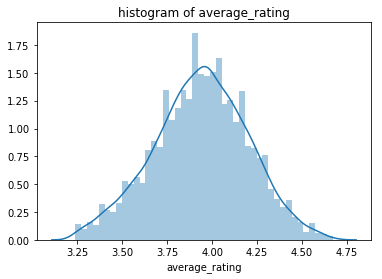

In [100]:
hist(df6,'average_rating')
plt.show()

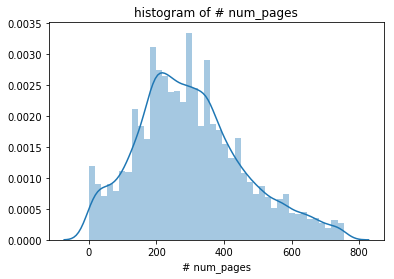

In [101]:
hist(df6,'# num_pages')
plt.show()

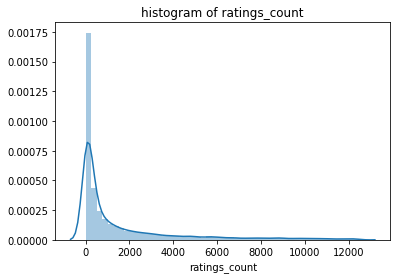

In [102]:
hist(df6,'ratings_count')
plt.show()

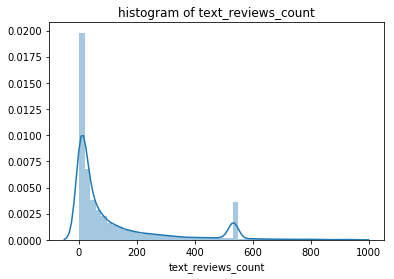

In [103]:
hist(df6,'text_reviews_count')
plt.show()

In [0]:
def bar_chart(df,column):
    top10_value=df[column].value_counts(sort=True)[:10]
    top10_value.plot.barh()
    # sns.countplot(data=df6, x = 'authors')
    plt.title('Top 10 counts of '+ column)
    plt.show()
    return

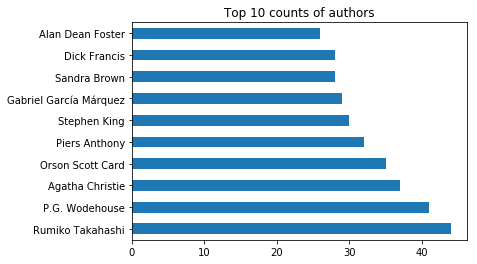

In [105]:
bar_chart(df6,'authors')

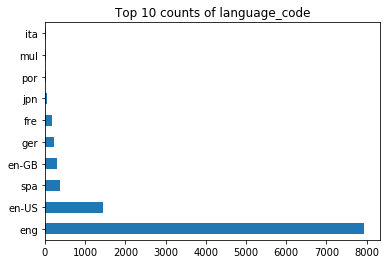

In [106]:
bar_chart(df6,'language_code')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


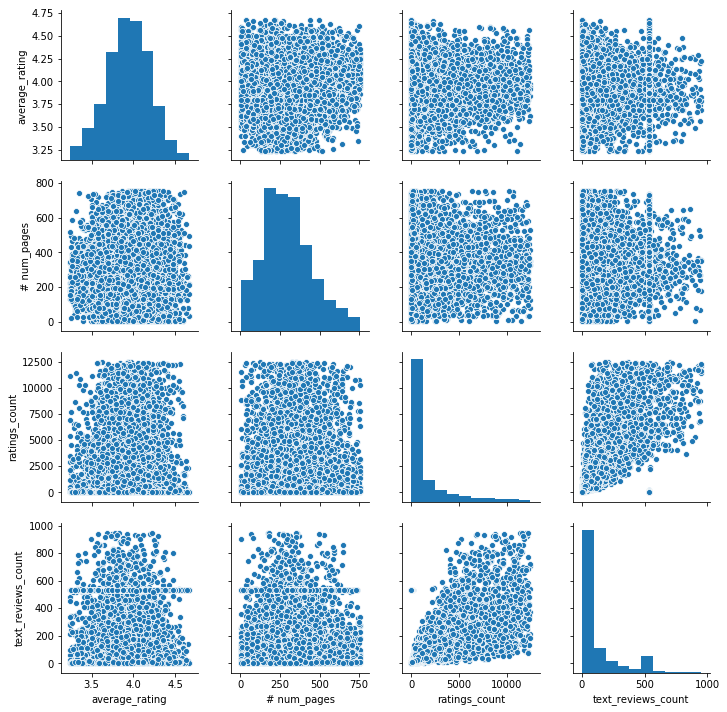

In [107]:
# There is slightly correlation between rating count and text review count

sns.pairplot(df6, size=2.5)
plt.show()

In [0]:
def pair_wise_boxplot (df,p1,p2):
    sns.boxplot(x=p1, y=p2, data=df).set_title("Boxplot "+p1 +' vs '+p2)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    return

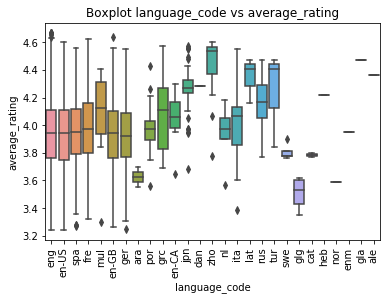

In [115]:
pair_wise_boxplot(df6,'language_code','average_rating')

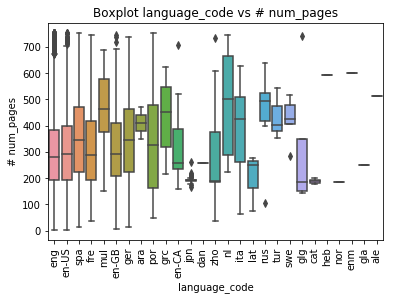

In [116]:
pair_wise_boxplot(df6,'language_code','# num_pages')

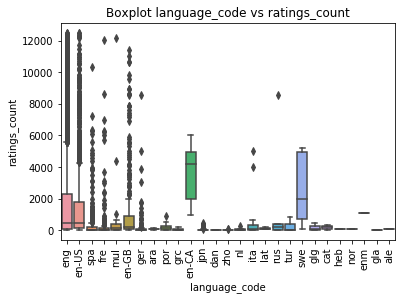

In [117]:
pair_wise_boxplot(df6,'language_code','ratings_count')

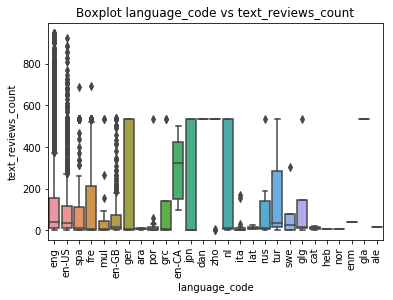

In [118]:
pair_wise_boxplot(df6,'language_code','text_reviews_count')

In [0]:
df6.to_csv('/content/gdrive/My Drive/UofT_MachineLearning/ML_Project/books_clean.csv', index=False)